# Description

In this notebook, I will implement the simple Q-leanring from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging

In [29]:
class GridWorld:
    """
    2D maze for navigation from start to end
    """
    def __init__(self, width, height, start_pos, end_pos) -> None:
        self.width = width
        self.height = height
        self.start_pos = start_pos
        self.end_pos = end_pos
        self.state = self.start_pos  # Initialized state as start position.
        self.list_available_action = {'up': np.array([-1, 0]), 'down': np.array([1, 0]), 'left': np.array([0, -1]), 'right': np.array([0, 1])}

    def is_valid_state(self, state):
        """
        Check current state is valid
        """
        if (0 <= state[0] <= self.height - 1) and \
            (0 <= state[1] <= self.width - 1):
            return True
        else:
            return False

    def step(self, action):
        """
        Take a step in the environment: update current state by next state

        Args:
        - action: Action to be taken

        Returns:
        - is_done (bool): indicates whether next state is goal
        """
        is_done = False

        next_state = self.state + self.list_available_action[action]
        if self.is_valid_state(next_state):
            if (next_state == self.end_pos).all():
               is_done = True 
            else:
                print(f"Action: {action} -> Next State: {next_state}")
                self.state = next_state

        return is_done



class Agent:
    """
    Define the agent with positon and policy
    """

    def __init__(self) -> None:
        self.list_agent_action = ['left', 'right', 'up', 'down']

    def get_action(self, env):
        """
        The policy function: determine the next step, which will closer to the goal
        """
        current_state = env.state
        list_valid_actions = {}

        for action in self.list_agent_action:
            next_state = current_state + env.list_available_action[action]
            
            if env.is_valid_state(next_state): 
                list_valid_actions[action] = np.sum(np.abs(next_state - env.end_pos))  

        if list_valid_actions != None:
            return min(list_valid_actions, key=list_valid_actions.get)  # Return action with cloest distance to the end_pos
        else:
            return 'down'


def run_simulation_with_agent(env: GridWorld, agent: Agent):
    """
    Run the simulation with the given agent's policy

    Args:
    - agent: Agent to be used for navigation
    """

    while 1:
        # Visualization
        grid = np.zeros((env.height, env.width))
        grid[tuple(env.state)] = 1  # current state
        grid[tuple(env.end_pos)] = 2  # goal

        plt.imshow(grid, cmap='Pastel1')
        plt.show()

        # Pass the current status of the environment to agent. 
        # Agent will decide the next action
        action = agent.get_action(env)

        is_done = env.step(action)
        if is_done:
            print(f"Goal reach")
            break

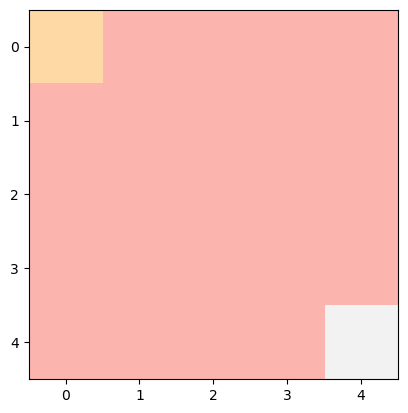

Action: right -> Next State: [0 1]


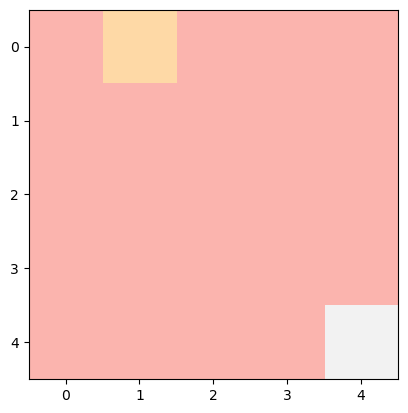

Action: right -> Next State: [0 2]


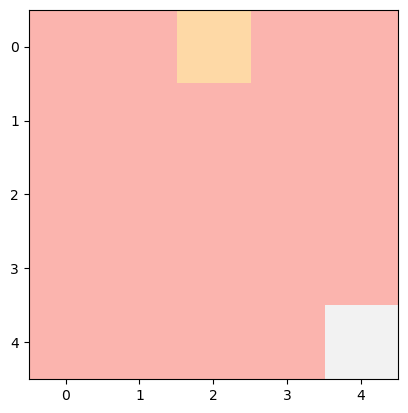

Action: right -> Next State: [0 3]


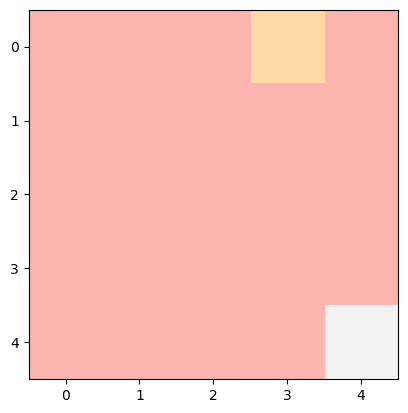

Action: right -> Next State: [0 4]


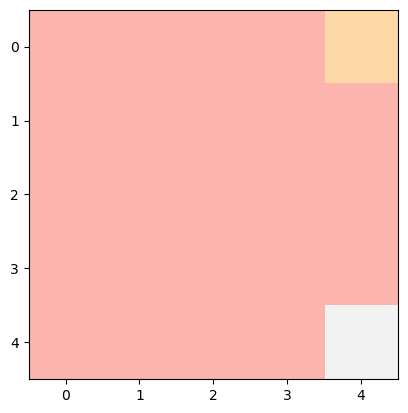

Action: down -> Next State: [1 4]


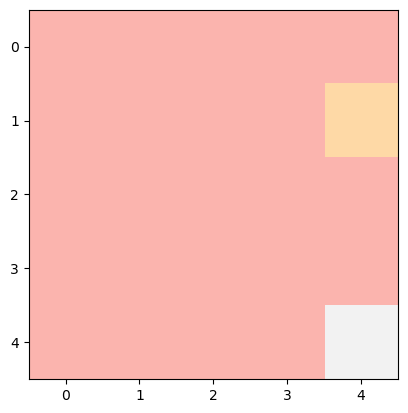

Action: down -> Next State: [2 4]


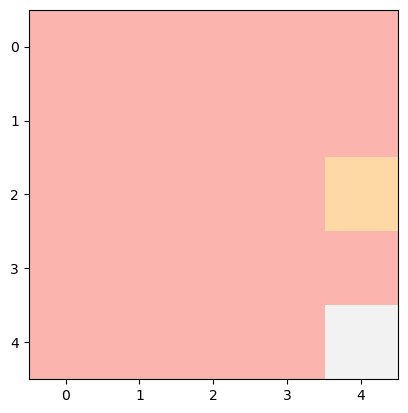

Action: down -> Next State: [3 4]


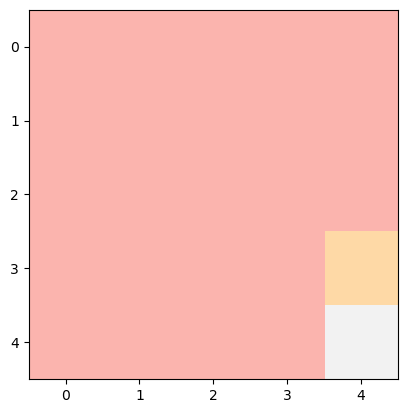

Goal reach


In [30]:
env = GridWorld(width=5, height=5, start_pos=(0,0), end_pos=(4,4))
agent = Agent()

run_simulation_with_agent(env, agent)